In [12]:
from typing import Optional, Tuple
from astropy.io import fits
from astropy.table import Table
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import gaussian_kde
import matplotlib.cm as cm
import seaborn as sns
sns.set_theme(style="ticks")

In [13]:
file_ = "../iDR4-SPLUS-PStotal-PSF-16r175_class05_flags4.csv"
df = pd.read_csv(file_)

In [14]:
df

,Field,ID,RA,DEC,X,Y,FWHM,FWHM_n,ISOarea,KRON_RADIUS,...,J0410_psf,e_J0410_psf,J0430_psf,e_J0430_psf,J0515_psf,e_J0515_psf,J0660_psf,e_J0660_psf,J0861_psf,e_J0861_psf
0,b'HYDRA-0011',b'iDR4_3_HYDRA-0011_0000122',149.957794,-24.588993,10330.6650,1033.1914,0.000383,1.234561,0.000002,3.242556,...,18.153698,0.071,17.998697,0.065,17.525698,0.051,17.206259,0.043,17.104158,0.051
1,b'HYDRA-0011',b'iDR4_3_HYDRA-0011_0000137',150.534388,-24.589628,6898.3530,1042.0739,0.000381,1.227902,0.000003,3.074517,...,17.229670,0.049,17.134670,0.048,16.508670,0.041,16.176670,0.126,15.964670,0.041
2,b'HYDRA-0011',b'iDR4_3_HYDRA-0011_0000200',150.119570,-24.587243,9367.6540,1049.7621,0.000367,1.184599,0.000004,3.030711,...,19.439140,0.128,19.209140,0.086,17.697142,0.046,16.147823,0.038,15.237605,0.038
3,b'HYDRA-0011',b'iDR4_3_HYDRA-0011_0000231',150.104989,-24.586636,9454.4780,1053.3187,0.000356,1.148883,0.000004,3.193642,...,17.615140,0.065,17.538141,0.058,16.946140,0.042,16.559822,0.034,16.446606,0.041
4,b'HYDRA-0011',b'iDR4_3_HYDRA-0011_0000251',149.944931,-24.585065,10407.3860,1058.4563,0.000385,1.243178,0.000003,3.187768,...,17.537746,0.061,17.358746,0.063,16.672747,0.051,16.169260,0.038,16.064340,0.050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2060847,b'STRIPE82-0170',b'iDR4_3_STRIPE82-0170_0048324',358.326089,1.057939,7179.7407,7843.4766,0.000316,0.981167,0.000002,3.362761,...,17.930109,0.032,17.880110,0.028,17.508220,0.026,NaN,NaN,17.148645,0.029
2060848,b'STRIPE82-0170',b'iDR4_3_STRIPE82-0170_0048211',357.983195,1.051064,9423.9390,7798.7783,0.000301,0.936742,0.000002,3.218857,...,19.645690,0.094,NaN,NaN,18.314690,0.032,NaN,NaN,16.349434,0.027
2060849,b'STRIPE82-0170',b'iDR4_3_STRIPE82-0170_0048420',358.189227,1.301481,8075.3257,9437.8100,0.000336,1.043616,0.000003,3.184011,...,17.896680,0.036,17.764680,0.030,17.265680,0.021,17.067595,0.040,16.788515,0.027
2060850,b'STRIPE82-0170',b'iDR4_3_STRIPE82-0170_0048652',357.957820,1.285262,9589.8220,9331.9410,0.000319,0.991412,0.000002,3.517311,...,18.118427,0.033,18.156427,0.034,17.658428,0.025,17.525522,0.044,17.293554,0.037


In [15]:
# Remove magelanic clouds
filtered_df = df[~df['Field'].str.contains('MC')]

In [16]:
filtered_df

,Field,ID,RA,DEC,X,Y,FWHM,FWHM_n,ISOarea,KRON_RADIUS,...,J0410_psf,e_J0410_psf,J0430_psf,e_J0430_psf,J0515_psf,e_J0515_psf,J0660_psf,e_J0660_psf,J0861_psf,e_J0861_psf
0,b'HYDRA-0011',b'iDR4_3_HYDRA-0011_0000122',149.957794,-24.588993,10330.6650,1033.1914,0.000383,1.234561,0.000002,3.242556,...,18.153698,0.071,17.998697,0.065,17.525698,0.051,17.206259,0.043,17.104158,0.051
1,b'HYDRA-0011',b'iDR4_3_HYDRA-0011_0000137',150.534388,-24.589628,6898.3530,1042.0739,0.000381,1.227902,0.000003,3.074517,...,17.229670,0.049,17.134670,0.048,16.508670,0.041,16.176670,0.126,15.964670,0.041
2,b'HYDRA-0011',b'iDR4_3_HYDRA-0011_0000200',150.119570,-24.587243,9367.6540,1049.7621,0.000367,1.184599,0.000004,3.030711,...,19.439140,0.128,19.209140,0.086,17.697142,0.046,16.147823,0.038,15.237605,0.038
3,b'HYDRA-0011',b'iDR4_3_HYDRA-0011_0000231',150.104989,-24.586636,9454.4780,1053.3187,0.000356,1.148883,0.000004,3.193642,...,17.615140,0.065,17.538141,0.058,16.946140,0.042,16.559822,0.034,16.446606,0.041
4,b'HYDRA-0011',b'iDR4_3_HYDRA-0011_0000251',149.944931,-24.585065,10407.3860,1058.4563,0.000385,1.243178,0.000003,3.187768,...,17.537746,0.061,17.358746,0.063,16.672747,0.051,16.169260,0.038,16.064340,0.050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2060847,b'STRIPE82-0170',b'iDR4_3_STRIPE82-0170_0048324',358.326089,1.057939,7179.7407,7843.4766,0.000316,0.981167,0.000002,3.362761,...,17.930109,0.032,17.880110,0.028,17.508220,0.026,NaN,NaN,17.148645,0.029
2060848,b'STRIPE82-0170',b'iDR4_3_STRIPE82-0170_0048211',357.983195,1.051064,9423.9390,7798.7783,0.000301,0.936742,0.000002,3.218857,...,19.645690,0.094,NaN,NaN,18.314690,0.032,NaN,NaN,16.349434,0.027
2060849,b'STRIPE82-0170',b'iDR4_3_STRIPE82-0170_0048420',358.189227,1.301481,8075.3257,9437.8100,0.000336,1.043616,0.000003,3.184011,...,17.896680,0.036,17.764680,0.030,17.265680,0.021,17.067595,0.040,16.788515,0.027
2060850,b'STRIPE82-0170',b'iDR4_3_STRIPE82-0170_0048652',357.957820,1.285262,9589.8220,9331.9410,0.000319,0.991412,0.000002,3.517311,...,18.118427,0.033,18.156427,0.034,17.658428,0.025,17.525522,0.044,17.293554,0.037


In [17]:
# Convert the data into an Astropy Table
tab = Table.from_pandas(filtered_df)
len(tab)

1793739

In [18]:
tab.colnames

['Field',
 'ID',
 'RA',
 'DEC',
 'X',
 'Y',
 'FWHM',
 'FWHM_n',
 'ISOarea',
 'KRON_RADIUS',
 'MU_MAX_INST',
 'PETRO_RADIUS',
 'SEX_FLAGS_DET',
 'SEX_NUMBER_DET',
 'CLASS_STAR',
 's2n_DET_PStotal',
 'THETA',
 'ELLIPTICITY',
 'ELONGATION',
 'FLUX_RADIUS_20',
 'FLUX_RADIUS_50',
 'FLUX_RADIUS_70',
 'FLUX_RADIUS_90',
 's2n_r_PStotal',
 's2n_J0660_PStotal',
 's2n_i_PStotal',
 'FWHM_r',
 'FWHM_n_r',
 'FWHM_J0660',
 'FWHM_n_J0660',
 'FWHM_i',
 'FWHM_n_i',
 'SEX_FLAGS_r',
 'SEX_FLAGS_J0660',
 'SEX_FLAGS_i',
 'CLASS_STAR_r',
 'CLASS_STAR_J0660',
 'CLASS_STAR_i',
 'r_PStotal',
 'e_r_PStotal',
 'g_PStotal',
 'e_g_PStotal',
 'i_PStotal',
 'e_i_PStotal',
 'u_PStotal',
 'e_u_PStotal',
 'z_PStotal',
 'e_z_PStotal',
 'J0378_PStotal',
 'e_J0378_PStotal',
 'J0395_PStotal',
 'e_J0395_PStotal',
 'J0410_PStotal',
 'e_J0410_PStotal',
 'J0430_PStotal',
 'e_J0430_PStotal',
 'J0515_PStotal',
 'e_J0515_PStotal',
 'J0660_PStotal',
 'e_J0660_PStotal',
 'J0861_PStotal',
 'e_J0861_PStotal',
 'r_psf',
 'e_r_psf',
 'g

In [19]:
# See the dimesion of the CCD
print(tab['X'].max())
print(tab['Y'].max())

10675.626
10402.077


In [20]:
# Masking, usar FLATS menor que 4
# Masking
m_x =  (tab["J0660_PStotal"] <= 19.4) & (tab["i_PStotal"] <= 19.2)

m_err = (tab["e_r_PStotal"] <= 0.2) &  \
        (tab["e_J0660_PStotal"] <= 0.2) & \
        (tab["e_i_PStotal"] <= 0.2)


m_sn = (tab["s2n_r_PStotal"] >= 10) & \
       (tab["s2n_J0660_PStotal"] >= 10) & \
        (tab["s2n_i_PStotal"] >= 10)

m_ell = (tab["ELLIPTICITY"]) <= 0.2

m_50 = (tab["FLUX_RADIUS_50"]) <= 3

valid_ellipticity_range = (0.1, 0.8)  # Example valid range for ellipticity
valid_elongation_range = (1.0, 3.0)   # Example valid range for elongation
shape_mask = (tab['ELLIPTICITY'] >= valid_ellipticity_range[0]) & \
             (tab['ELLIPTICITY'] <= valid_ellipticity_range[1]) & \
             (tab['ELONGATION'] >= valid_elongation_range[0]) & \
             (tab['ELONGATION'] <= valid_elongation_range[1])

valid_fwhm_range = (0.0008, 1000.0)  # Example valid range for FWHM in pixels
fwhm_mask = (tab['FWHM'] >= valid_fwhm_range[0]) & \
            (tab['FWHM'] <= valid_fwhm_range[1])

mask = m_x & m_err & m_sn & m_ell & m_50# Use fwhm_mask instead of valid_fwhm_range
tab_clean = tab[mask]


In [21]:
len(tab_clean)

1676988

In [11]:
# Define the dimensions of your CCD
ccd_width = int(tab_clean['X'].max())  # Replace with the actual width of your CCD image
ccd_height = int(tab_clean['Y'].max())  # Replace with the actual height of your CCD image

# Define the buffer zone size for corner removal
buffer_size = 50  # Adjust as needed

# Define the corners of the CCD
corners = [(0, 0), (0, ccd_height), (ccd_width, 0), (ccd_width, ccd_height)]

# Create a mask to identify objects in the corners
corner_mask = np.zeros(len(tab_clean), dtype=bool)

for corner in corners:
    corner_x, corner_y = corner
    corner_distance = np.sqrt((tab_clean['X'] - corner_x)**2 + (tab_clean['Y'] - corner_y)**2)
    corner_mask |= corner_distance < buffer_size

# Apply the corner mask to filter out objects in the corners
tab_clean_filtered = tab_clean[~corner_mask]


In [12]:
tab_clean_filtered

Field,ID,RA,DEC,X,Y,FWHM,FWHM_n,ISOarea,KRON_RADIUS,MU_MAX_INST,PETRO_RADIUS,SEX_FLAGS_DET,SEX_NUMBER_DET,CLASS_STAR,s2n_DET_PStotal,THETA,ELLIPTICITY,ELONGATION,FLUX_RADIUS_20,FLUX_RADIUS_50,FLUX_RADIUS_70,FLUX_RADIUS_90,s2n_r_PStotal,s2n_J0660_PStotal,s2n_i_PStotal,FWHM_r,FWHM_n_r,FWHM_J0660,FWHM_n_J0660,FWHM_i,FWHM_n_i,SEX_FLAGS_r,SEX_FLAGS_J0660,SEX_FLAGS_i,CLASS_STAR_r,CLASS_STAR_J0660,CLASS_STAR_i,r_PStotal,e_r_PStotal,g_PStotal,e_g_PStotal,i_PStotal,e_i_PStotal,u_PStotal,e_u_PStotal,z_PStotal,e_z_PStotal,J0378_PStotal,e_J0378_PStotal,J0395_PStotal,e_J0395_PStotal,J0410_PStotal,e_J0410_PStotal,J0430_PStotal,e_J0430_PStotal,J0515_PStotal,e_J0515_PStotal,J0660_PStotal,e_J0660_PStotal,J0861_PStotal,e_J0861_PStotal,r_psf,e_r_psf,g_psf,e_g_psf,i_psf,e_i_psf,u_psf,e_u_psf,z_psf,e_z_psf,J0378_psf,e_J0378_psf,J0395_psf,e_J0395_psf,J0410_psf,e_J0410_psf,J0430_psf,e_J0430_psf,J0515_psf,e_J0515_psf,J0660_psf,e_J0660_psf,J0861_psf,e_J0861_psf
str16,str31,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
b'HYDRA-0011',b'iDR4_3_HYDRA-0011_0000087',150.18360745532482,-24.58967950722959,8986.382,1035.5181,0.0003552541,1.1462904,1.2370757e-06,3.1354523,16.382275,3.3,0,87,0.98132503,-1.0,64.37233,0.1812669,1.2213992,0.7450161,1.3153805,1.8284352,2.809402,111.09411,72.60247,109.59076,0.0003240599,1.1193243,0.00033333464,1.1498249,0.00036508546,1.1551476,0,0,0,1,1.0,1,17.751118,0.009901841,18.250015,0.014493953,17.57323,0.010260135,19.70943,0.06264063,17.498741,0.014122078,19.36529,0.07919605,19.580486,0.14304256,18.77221,0.06377973,18.553696,0.05147709,18.131874,0.030259786,17.69752,0.015151499,17.549124,0.025756108,17.8597,0.036,18.403461,0.042,17.6708,0.041,19.625378,0.073,17.591928,0.049,19.369377,0.093,19.546377,0.126,18.926462,0.087,18.679462,0.067,18.298462,0.062,17.800776,0.041,17.62093,0.055
b'HYDRA-0011',b'iDR4_3_HYDRA-0011_0000097',150.42627988674565,-24.588548607458485,7541.8745,1047.7927,0.0003371683,1.0879334,9.33642e-07,3.3049257,16.59106,3.9599998,0,97,0.98261994,-1.0,66.05992,0.082404494,1.0898048,0.6770706,1.2713064,1.7048908,2.7685635,83.59067,55.43553,88.84051,0.00030931726,1.0684023,0.00031678056,1.0927223,0.00033786977,1.0690359,0,0,0,1,1.0,1,18.226868,0.012789212,19.186169,0.025327276,17.896606,0.012021892,22.887043,0.982239,17.735977,0.016286718,99.0,99.0,22.110115,1.2986438,20.497301,0.25192294,20.099236,0.17022283,19.128601,0.059403516,18.129374,0.019284721,17.86849,0.03144047,18.302206,0.035,19.289682,0.047,17.966728,0.039,--,--,17.816969,0.048,--,--,--,--,--,--,--,--,19.242682,0.084,18.18631,0.046,17.90797,0.056
b'HYDRA-0011',b'iDR4_3_HYDRA-0011_0000149',150.07294928366412,-24.585837814735594,9645.235,1057.6019,0.0003601656,1.1621383,8.169368e-07,4.1379957,17.08505,3.3,0,149,0.9795381,-1.0,71.10302,0.045940816,1.0481529,0.76070344,1.3903313,1.9402273,3.4439542,75.89872,49.816486,71.63959,0.00033945078,1.1724855,0.00033896713,1.169254,0.00036799125,1.1643417,0,0,0,1,1.0,1,18.389402,0.014817958,19.012527,0.02428474,18.233078,0.016099108,21.179096,0.22440538,18.158293,0.023698535,20.530415,0.2160703,20.179607,0.24481654,19.721678,0.14216092,19.559769,0.118268825,18.78904,0.04953793,18.31132,0.022576142,18.155947,0.0413944,18.51068,0.041,19.203657,0.051,18.350014,0.049,--,--,18.270042,0.063,--,--,20.118093,0.205,19.847658,0.149,19.761658,0.126,18.996658,0.069,18.404678,0.044,18.268044,0.071
b'HYDRA-0011',b'iDR4_3_HYDRA-0

In [13]:
ri = tab_clean["r_PStotal"] - tab_clean["i_PStotal"]
rj660 = tab_clean["r_PStotal"] - tab_clean["J0660_PStotal"]

In [14]:
def equation(m, c, x):
    # Define your equation here, for example, a linear equation: y = mx + c
    y = m * x + c
    return y

In [15]:
def plots(
    color1: np.ndarray,
    color2: np.ndarray,
    x_values: np.ndarray,
    y_values: np.ndarray,
    y_values1: Optional[np.ndarray] = None,
    sample_size: Optional[int] = None,
    xlim: Optional[Tuple[float, float]] = None,
    ylim: Optional[Tuple[float, float]] = None,
    density_method: str = "gaussian_kde",
    colormap: str = "viridis",
    label1: str = None,
    label2: str = None,
    label3: str = None,
    title: str = "Scatter Plot with Density Coloring"
) -> None:
    """
    Plots a scatter plot with points colored based on their density and one or two lines 
    defined by x_values, y_values, and optionally y_values1.
    """

    # Handle sampling and duplicate colors, ensuring equal lengths
    if sample_size is not None:
        unique_indices = np.random.choice(len(color1), size=sample_size, replace=False)
        color1, color2 = color1[unique_indices], color2[unique_indices]

    # Calculate density
    xy = np.vstack([color1, color2])
    if density_method == "gaussian_kde":
        density = gaussian_kde(xy)(xy)
    else:
        raise NotImplementedError(f"Density method {density_method} not supported.")

    # Sort points by density
    sorted_indices = density.argsort()[::-1]  # Descending order
    color1, color2, density = color1[sorted_indices], color2[sorted_indices], density[sorted_indices]

    # Create plot
    fig, ax = plt.subplots(figsize=(14, 11))

    # Customize scatter plot
    scatter_collection = ax.scatter(
        color1,
        color2,
        c=density,
        s=10,
        cmap=colormap,
        alpha=0.8,
        label=label1 if label1 else "Color 1"
    )

    # Customize colorbar
    plt.colorbar(scatter_collection, label="Density")

    # Customize line plots
    plt.plot(x_values, y_values, linewidth=2, color="red", label=label2 if label2 else "Line 1")
    if y_values1 is not None:
        plt.plot(x_values, y_values1, linewidth=2, color="blue", label=label3 if label3 else "Line 2")

    # Set limits
    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)

    # Add labels and title
    plt.xlabel(label1 if label1 else "Color 1")
    plt.ylabel(label2 if label2 else "Color 2")
    plt.title(title)

    # Add legend if labels are provided
    if label1 or label2 or label3:
        plt.legend()

    plt.show()

In [16]:
# Generate x values
x_values = np.linspace(-10, 10, 100)  # Generate 100 x values from 0 to 10

# Compute y values using the equation
y_values = equation(0.35, -0.35, x_values)

In [17]:
y_values1 = equation(0.35, 0.30, x_values)

In [18]:
print(len(ri), len(rj660), len(x_values), len(y_values), len(y_values1))

1733486 1733486 100 100 100


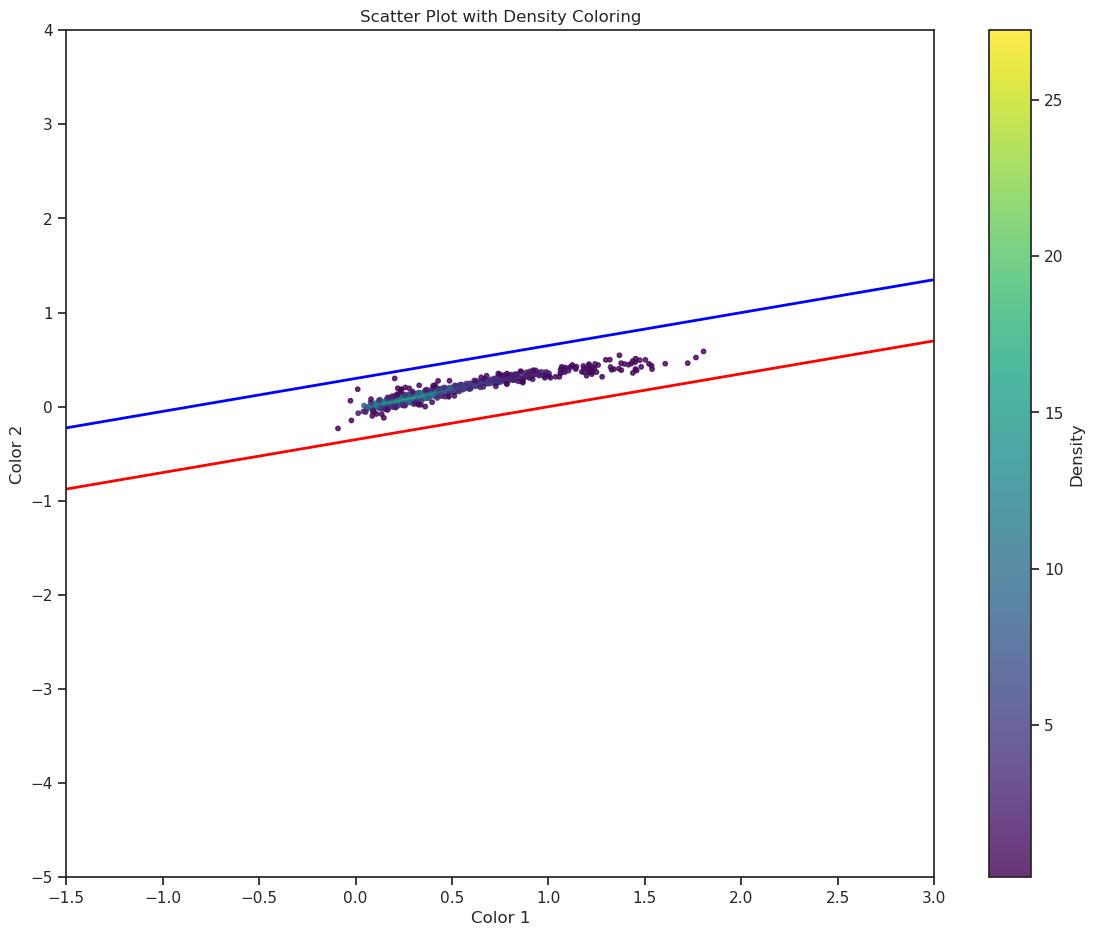

In [19]:
plots(ri, rj660, x_values, y_values, y_values1, xlim=(-1.5, 3), ylim=(-5, 4), sample_size=1000)

In [20]:
# Select objects below the line
# below_line = rj660 < equation(ri)
color_crit = (rj660  <= 0.35*ri - 0.35)

# upper_line = rj660 < equation(ri)
color_crit_upper = (rj660 >= 0.35*ri + 0.30)

In [21]:
tab_clean_below = tab_clean[color_crit]

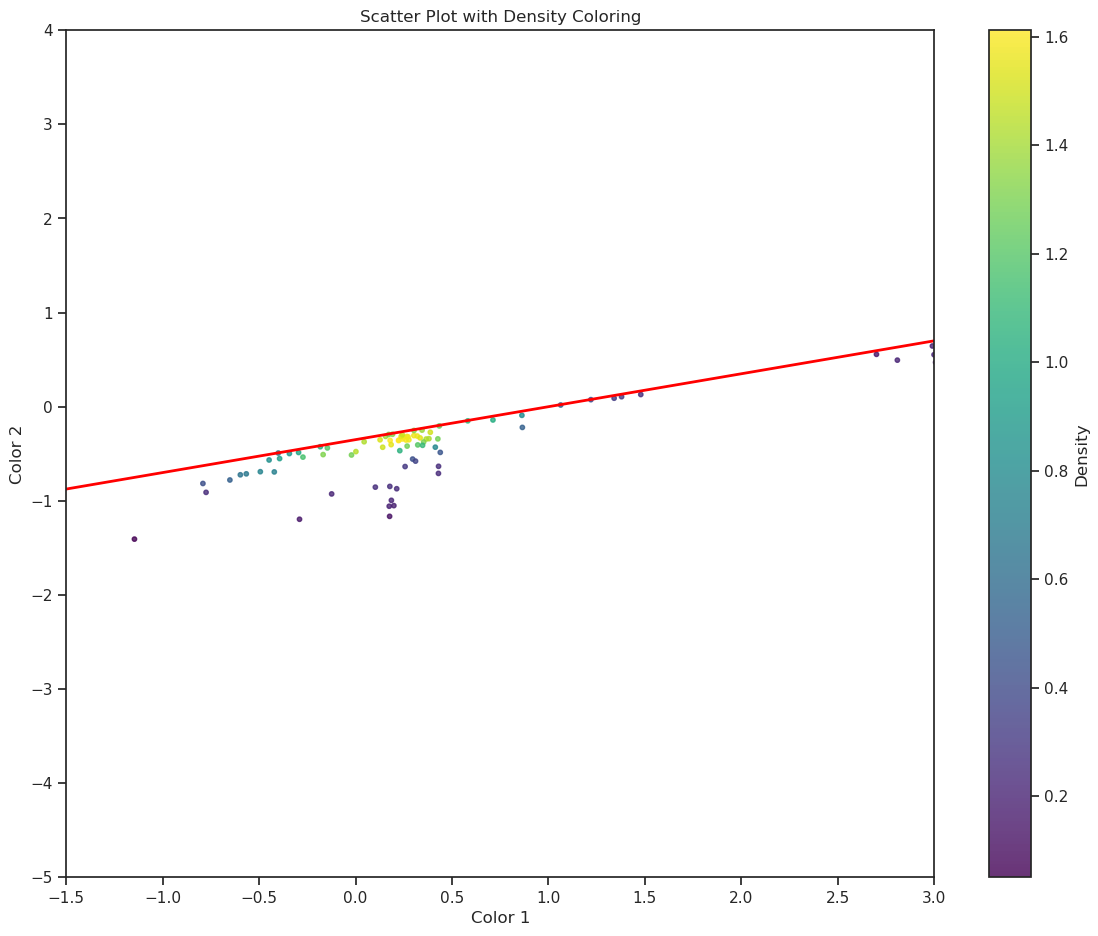

In [22]:
ri_below = tab_clean_below["r_PStotal"] - tab_clean_below["i_PStotal"]
rj660_below = tab_clean_below["r_PStotal"] - tab_clean_below["J0660_PStotal"]



plots(ri_below, rj660_below, x_values, y_values, xlim=(-1.5, 3), ylim=(-5, 4))


In [23]:
tab_clean_below

Field,ID,RA,DEC,X,Y,FWHM,FWHM_n,ISOarea,KRON_RADIUS,MU_MAX_INST,PETRO_RADIUS,SEX_FLAGS_DET,SEX_NUMBER_DET,CLASS_STAR,s2n_DET_PStotal,THETA,ELLIPTICITY,ELONGATION,FLUX_RADIUS_20,FLUX_RADIUS_50,FLUX_RADIUS_70,FLUX_RADIUS_90,s2n_r_PStotal,s2n_J0660_PStotal,s2n_i_PStotal,FWHM_r,FWHM_n_r,FWHM_J0660,FWHM_n_J0660,FWHM_i,FWHM_n_i,SEX_FLAGS_r,SEX_FLAGS_J0660,SEX_FLAGS_i,CLASS_STAR_r,CLASS_STAR_J0660,CLASS_STAR_i,r_PStotal,e_r_PStotal,g_PStotal,e_g_PStotal,i_PStotal,e_i_PStotal,u_PStotal,e_u_PStotal,z_PStotal,e_z_PStotal,J0378_PStotal,e_J0378_PStotal,J0395_PStotal,e_J0395_PStotal,J0410_PStotal,e_J0410_PStotal,J0430_PStotal,e_J0430_PStotal,J0515_PStotal,e_J0515_PStotal,J0660_PStotal,e_J0660_PStotal,J0861_PStotal,e_J0861_PStotal,r_psf,e_r_psf,g_psf,e_g_psf,i_psf,e_i_psf,u_psf,e_u_psf,z_psf,e_z_psf,J0378_psf,e_J0378_psf,J0395_psf,e_J0395_psf,J0410_psf,e_J0410_psf,J0430_psf,e_J0430_psf,J0515_psf,e_J0515_psf,J0660_psf,e_J0660_psf,J0861_psf,e_J0861_psf
str16,str31,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
b'HYDRA-0031',b'iDR4_3_HYDRA-0031_0006683',151.63944226852738,-27.22534637401943,5148.386,1994.2135,0.00033811585,0.9505993,9.33642e-07,4.1747355,17.010027,3.9599998,0,6683,0.98073053,-1.0,88.588715,0.023079515,1.0236248,0.76430345,1.4329184,2.074185,3.480278,70.31814,43.04777,67.42329,0.00035126877,0.9321551,0.00034419287,0.9960301,0.0003081133,0.92442155,0,0,0,1,1.0,1,18.449617,0.015310011,19.278599,0.02543846,18.182442,0.015753722,21.240694,0.23665273,18.076466,0.027018156,20.935394,0.25541976,20.719898,0.33162904,19.962906,0.14165254,20.302114,0.17183265,19.561863,0.094108336,18.868338,0.025008762,18.495407,0.047929645,18.510735,0.027,19.29073,0.036,18.206045,0.03,--,--,18.059263,0.05,--,--,--,--,19.99973,0.161,20.28673,0.145,19.63173,0.093,18.899734,0.042,18.520264,0.07
b'HYDRA-0041',b'iDR4_3_HYDRA-0041_0048840',153.29072646487342,-27.443992789785582,3348.9148,9642.534,0.00073218084,2.2966964,6.0686733e-07,3.7127457,17.1329,3.9599998,0,48840,0.9979575,-1.0,49.027245,0.18659616,1.2294017,0.89578855,1.5686802,2.1097064,3.1633477,78.17051,27.073694,57.143135,0.0008063283,2.5423825,0.0006284751,1.4938813,0.0004591347,1.4073837,0,0,0,1,1.0,1,17.956425,0.013797257,20.551481,0.12940657,18.247124,0.019214954,23.898476,3.45484,17.679998,0.018213553,99.0,99.0,21.172659,0.71730846,23.23285,4.1597996,22.062935,1.2689085,20.890469,0.3581515,19.15247,0.039837144,17.835749,0.027423328,20.261744,0.813,20.599571,0.13,18.256033,0.048,--,--,17.743824,0.042,--,--,--,--,--,--,--,--,--,--,19.134743,0.063,17.823824,0.048
b'HYDRA-0061',b'iDR4_3_HYDRA-0061_0013022',153.77262933733496,-31.289814477250182,5755.3013,2602.7969,0.0002986926,0.9567862,1.2370757e-06,3.3468444,16.18601,3.3,0,13022,0.9823838,-1.0,-80.86584,0.01835835,1.0187017,0.6759316,1.2551837,1.7750895,3.1564834,110.27977,69.160355,105.512886,0.00030506164,0.98088086,0.00031329843,0.9467905,0.00027940224,0.9243984,0,0,0,1,1.0,1,17.881975,0.009848918,18.422626,0.014196402,17.697615,0.010145773,19.801159,0.058237217,17.632189,0.0152273895,19.668495,0.092052154,19.842876,0.16223569,19.302763,0.085814565,19.135033,0.06488559,18.774351,0.042299557,18.285328,0.015704613,18.090847,0.0289432,17.924932,0.023,18.429117,0.025,17.724798,0.024,19.77368,0.069,17.687252,0.036,19.52193,0.079,19.74493,0.133,19.527647,0.103,19.145327,0.061,18.749117,0.055,18.326931,0.028,18.136251,0.052
b'HYDRA-0072',b'iDR4_3_HYD

In [24]:
tab_clean_upper = tab_clean[color_crit_upper]
tab_clean_upper

Field,ID,RA,DEC,X,Y,FWHM,FWHM_n,ISOarea,KRON_RADIUS,MU_MAX_INST,PETRO_RADIUS,SEX_FLAGS_DET,SEX_NUMBER_DET,CLASS_STAR,s2n_DET_PStotal,THETA,ELLIPTICITY,ELONGATION,FLUX_RADIUS_20,FLUX_RADIUS_50,FLUX_RADIUS_70,FLUX_RADIUS_90,s2n_r_PStotal,s2n_J0660_PStotal,s2n_i_PStotal,FWHM_r,FWHM_n_r,FWHM_J0660,FWHM_n_J0660,FWHM_i,FWHM_n_i,SEX_FLAGS_r,SEX_FLAGS_J0660,SEX_FLAGS_i,CLASS_STAR_r,CLASS_STAR_J0660,CLASS_STAR_i,r_PStotal,e_r_PStotal,g_PStotal,e_g_PStotal,i_PStotal,e_i_PStotal,u_PStotal,e_u_PStotal,z_PStotal,e_z_PStotal,J0378_PStotal,e_J0378_PStotal,J0395_PStotal,e_J0395_PStotal,J0410_PStotal,e_J0410_PStotal,J0430_PStotal,e_J0430_PStotal,J0515_PStotal,e_J0515_PStotal,J0660_PStotal,e_J0660_PStotal,J0861_PStotal,e_J0861_PStotal,r_psf,e_r_psf,g_psf,e_g_psf,i_psf,e_i_psf,u_psf,e_u_psf,z_psf,e_z_psf,J0378_psf,e_J0378_psf,J0395_psf,e_J0395_psf,J0410_psf,e_J0410_psf,J0430_psf,e_J0430_psf,J0515_psf,e_J0515_psf,J0660_psf,e_J0660_psf,J0861_psf,e_J0861_psf
str16,str31,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
b'HYDRA-0011',b'iDR4_3_HYDRA-0011_0036898',151.44028331867324,-23.83052191901166,1482.4852,6002.6665,0.0003129926,1.0099262,1.400463e-06,3.4788485,16.145227,2.73,0,36898,0.9992818,-1.0,27.41473,0.08944255,1.0982283,0.71763897,1.2016908,1.7937031,3.3864856,108.54374,89.97112,110.28208,0.0002866464,0.9900956,0.0015496736,5.345539,0.00031741933,1.0043297,0,0,0,1,1.0,1,17.764519,0.00943257,18.316687,0.01395109,17.590271,0.009300765,19.557903,0.056970276,17.53858,0.013530907,19.252598,0.07266544,19.245953,0.106381446,18.747341,0.057133146,18.654167,0.05060203,18.11444,0.027325982,17.27397,0.011379721,17.50974,0.023372473,17.782782,0.026,18.346827,0.035,17.600695,0.029,19.645386,0.084,17.5698,0.044,19.403385,0.064,19.321386,0.109,18.72649,0.07,18.675827,0.076,18.136457,0.041,17.680841,0.121,17.552286,0.054
b'HYDRA-0015',b'iDR4_3_HYDRA-0015_0026265',157.14980799936296,-23.805971911857306,4142.7026,6171.7803,0.00038776948,0.94994503,1.0270062e-06,3.6814728,16.250572,4.62,0,26265,0.98027223,-1.0,86.13437,0.018250644,1.0185899,0.8925339,1.6602669,2.3553648,3.7898788,67.31053,81.86196,61.226692,0.0003770274,0.97467035,0.0014831581,3.2150965,0.0003856951,0.9573348,0,0,0,1,1.0,1,18.169466,0.016694942,18.644934,0.02537129,18.012522,0.017967734,19.807034,0.08970959,17.92165,0.031610735,19.384628,0.09891677,19.68823,0.16964178,19.06161,0.09115176,18.978527,0.080465555,18.481045,0.045970984,17.405468,0.013727322,18.03789,0.048416868,18.229122,0.032,18.69077,0.043,18.028666,0.036,19.920067,0.115,17.9693,0.067,19.515068,0.107,--,--,19.13177,0.109,19.026768,0.095,18.538769,0.062,17.861122,0.141,18.056301,0.079
b'HYDRA-0016',b'iDR4_3_HYDRA-0016_0016968',158.87593769782865,-24.10997707692917,3024.6443,4179.349,0.000589669,1.0080642,2.2874228e-06,3.770822,16.766945,4.62,0,16968,0.97592336,-1.0,-50.890705,0.041823745,1.0436493,1.259354,2.3540993,3.3719444,5.762168,83.02412,111.114136,76.45764,0.0006255414,1.045813,0.00047064322,0.7414237,0.00063874014,0.9962552,0,0,0,1,1.0,1,17.934462,0.01335526,18.471827,0.018458854,17.707747,0.014251754,19.899017,0.061703812,17.643795,0.019330421,19.60998,0.08064261,19.702847,0.13464005,18.987246,0.06915045,18.78984,0.057075966,18.371826,0.037717894,17.158768,0.009979006,17.669783,0.022910157,18.017387,0.02,18.566065,0.025,17.784845,0.026,20.01711,0.065,17.698797,0.038,19.721111,0.072,--,--,19.098066,0.065,18.952066,0.061,18.

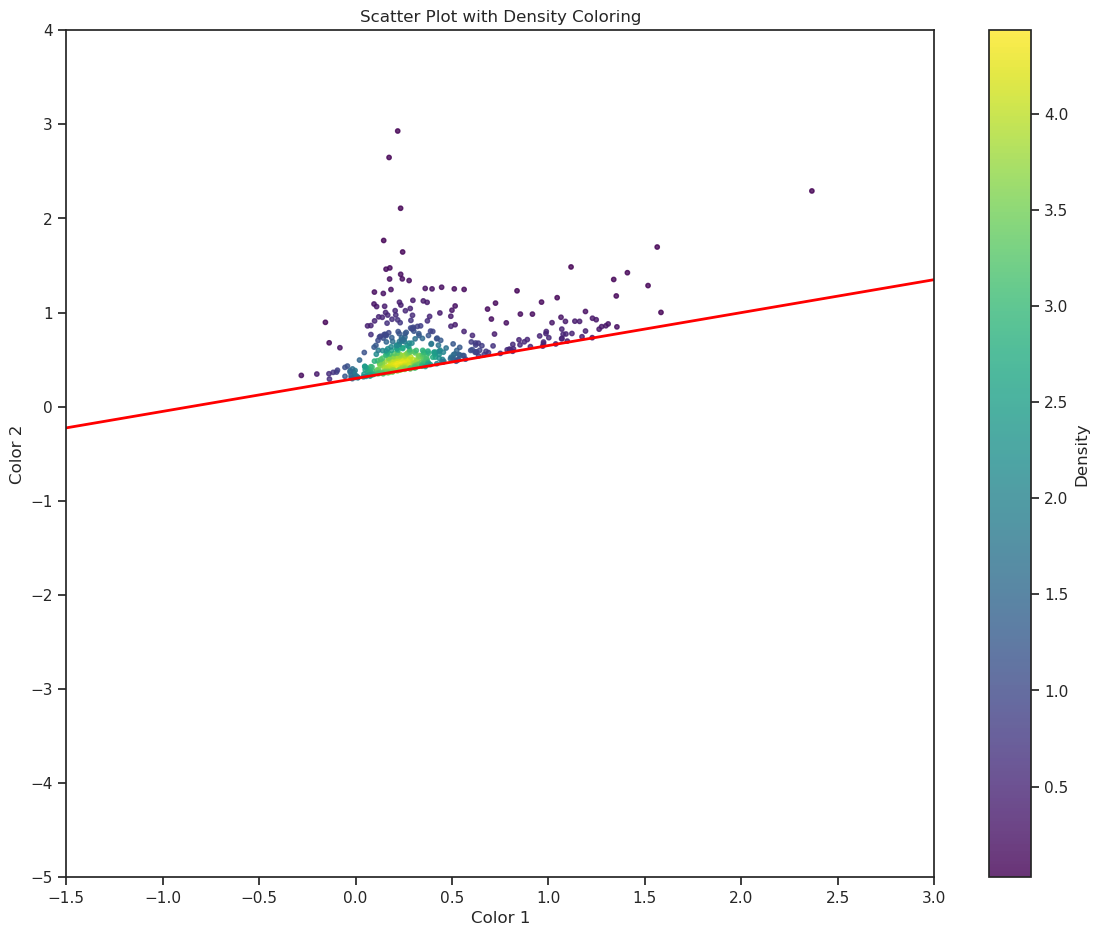

In [25]:
ri_upper = tab_clean_upper["r_PStotal"] - tab_clean_upper["i_PStotal"]
rj660_upper = tab_clean_upper["r_PStotal"] - tab_clean_upper["J0660_PStotal"]


plots(ri_upper, rj660_upper, x_values, y_values1, xlim=(-1.5, 3), ylim=(-5, 4))


In [26]:
len(tab_clean_below["Field"])
   

84

In [27]:
# Saving
# Save the table as a CSV file
#tab_clean_below.write('iDR4-SPLUS-PStotal-PSF-16r175_class06_flags4_bellow.csv', format='csv', overwrite=True)


Examining the position of these object on the CCD

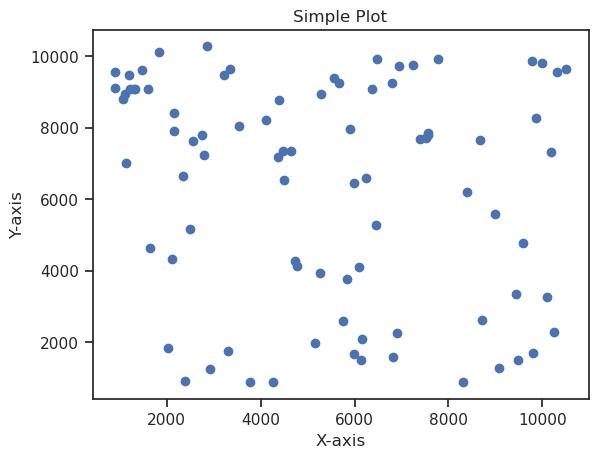

In [28]:
# Create a plot
plt.plot(tab_clean_below["X"], tab_clean_below['Y'], "o")

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Simple Plot')

# Show the plot
plt.show()


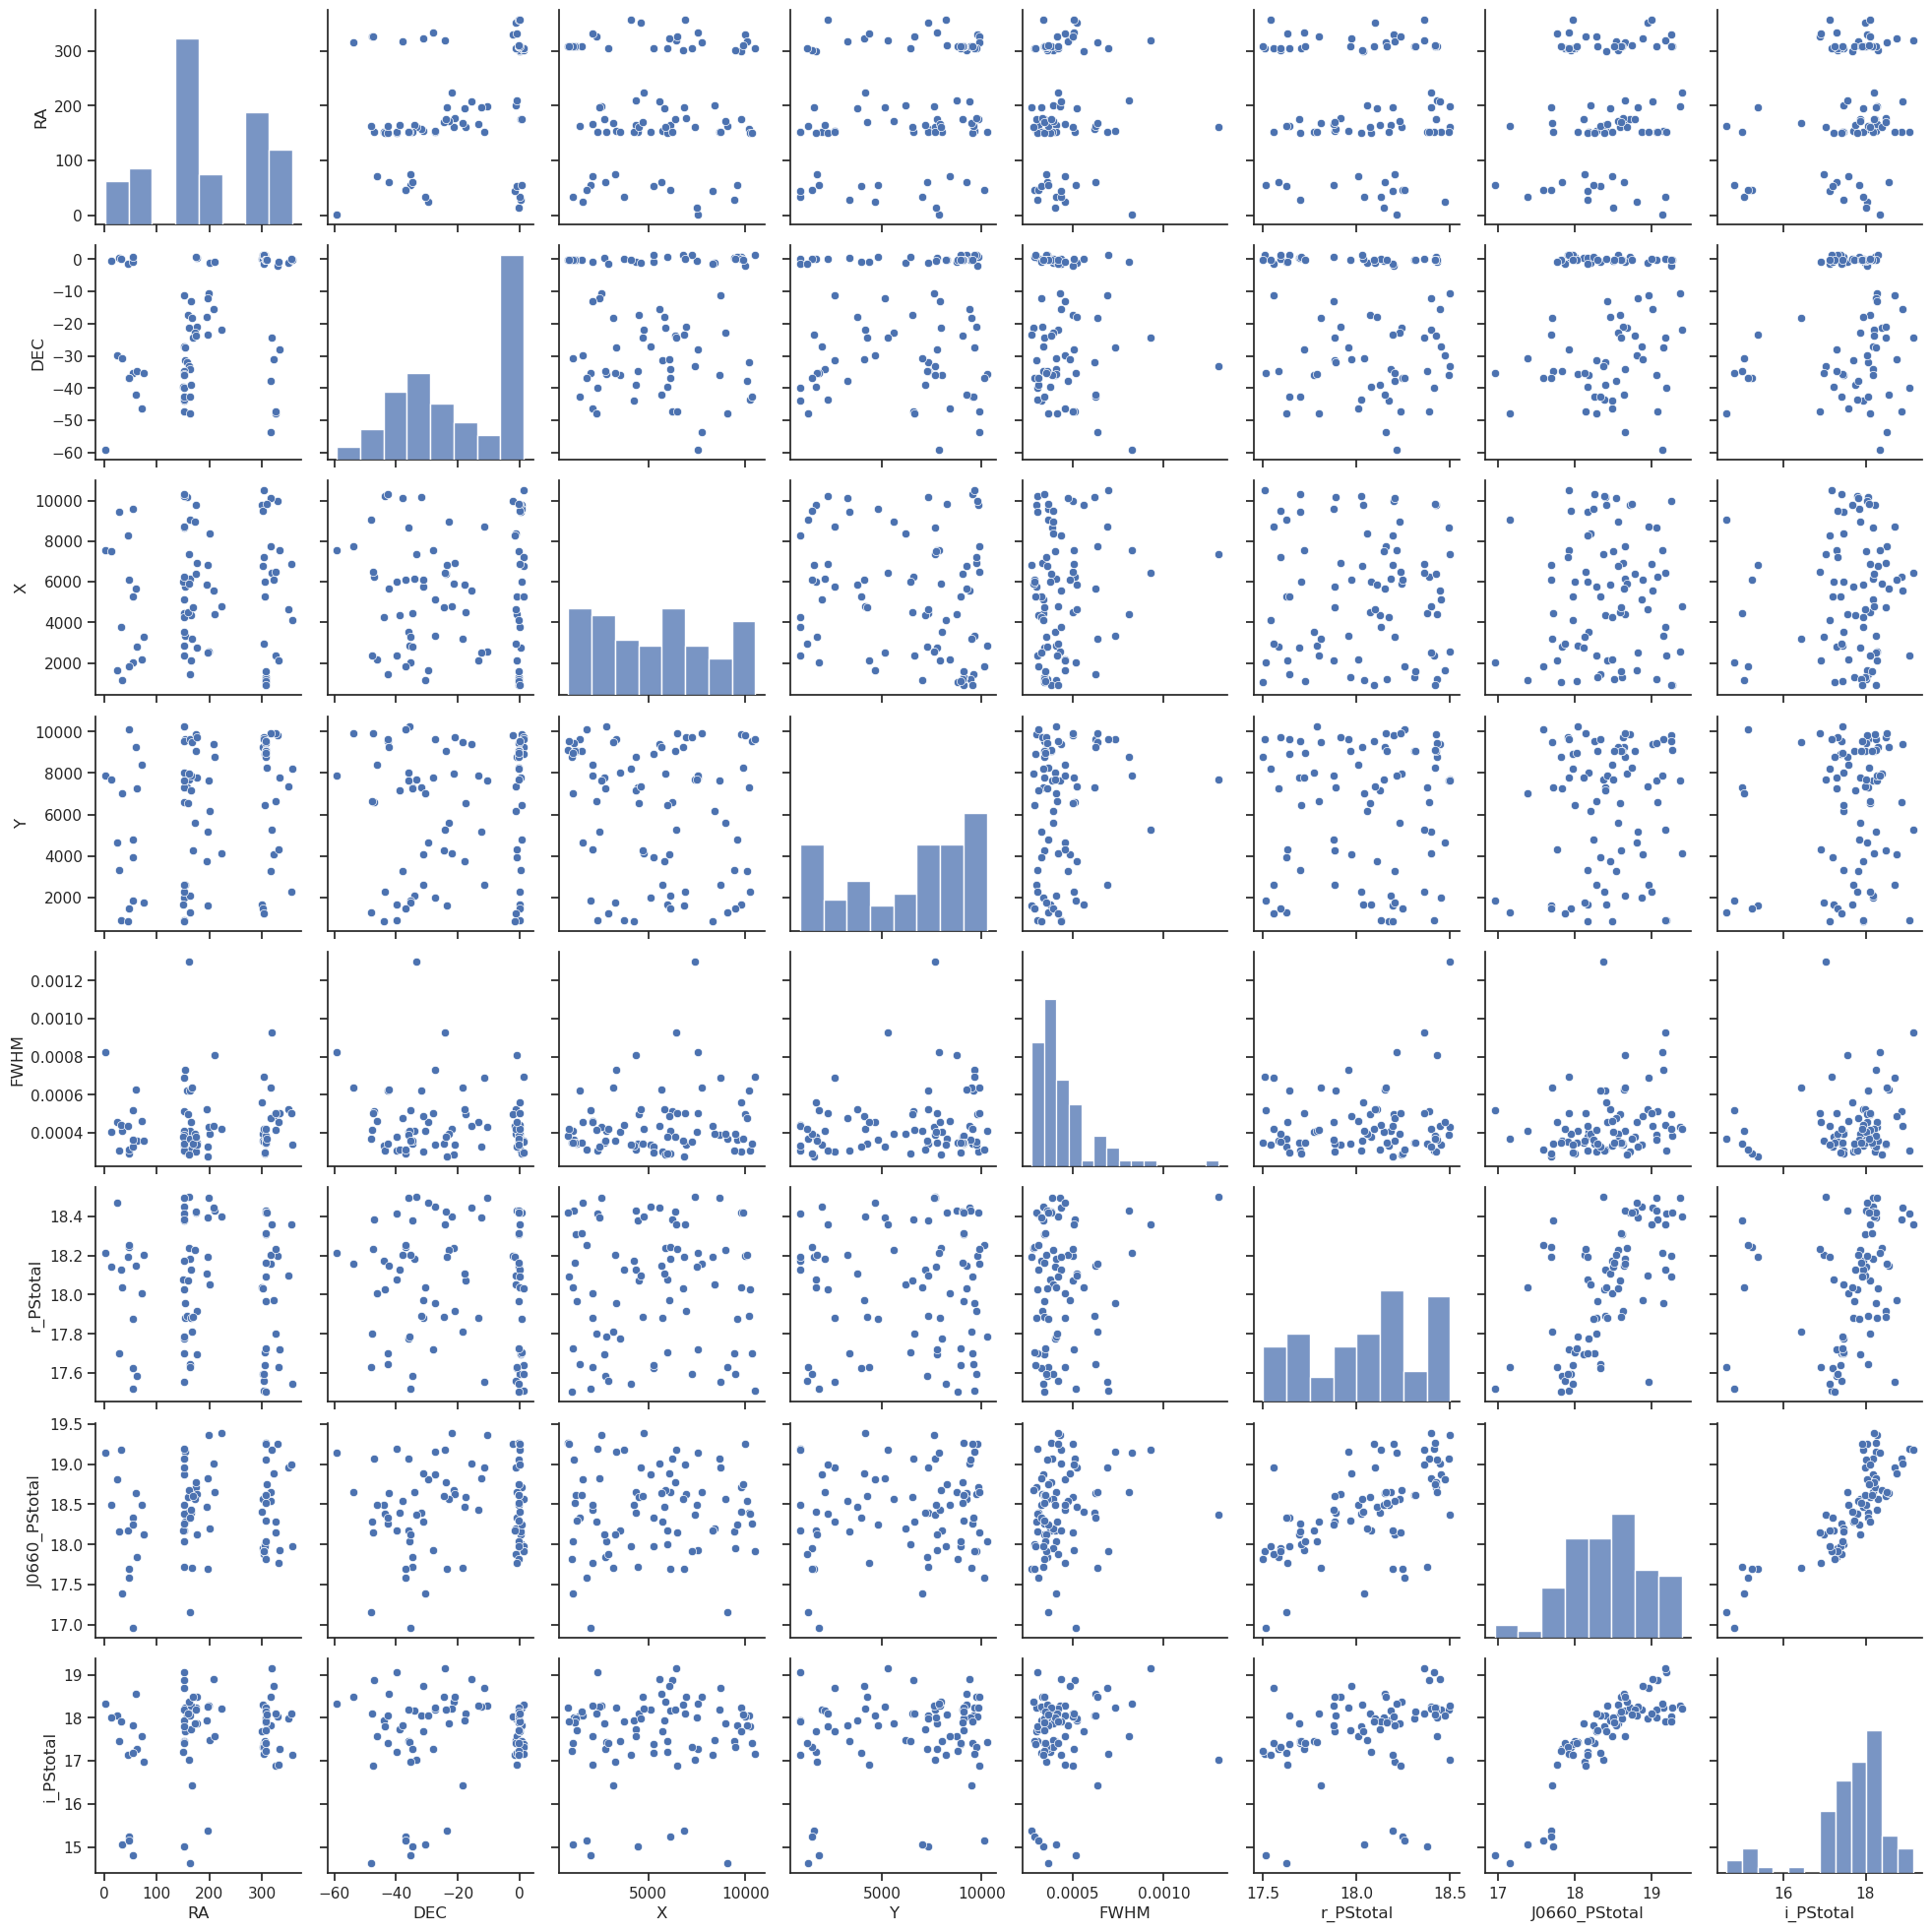

In [29]:
df_bellow = tab_clean_below.to_pandas()
#Select columns 
df_bellow_ = df_bellow[["RA", "DEC", "X", "Y", "FWHM", "r_PStotal", "J0660_PStotal", "i_PStotal"]]
             
sns.pairplot(df_bellow_)

### Object in the upper region

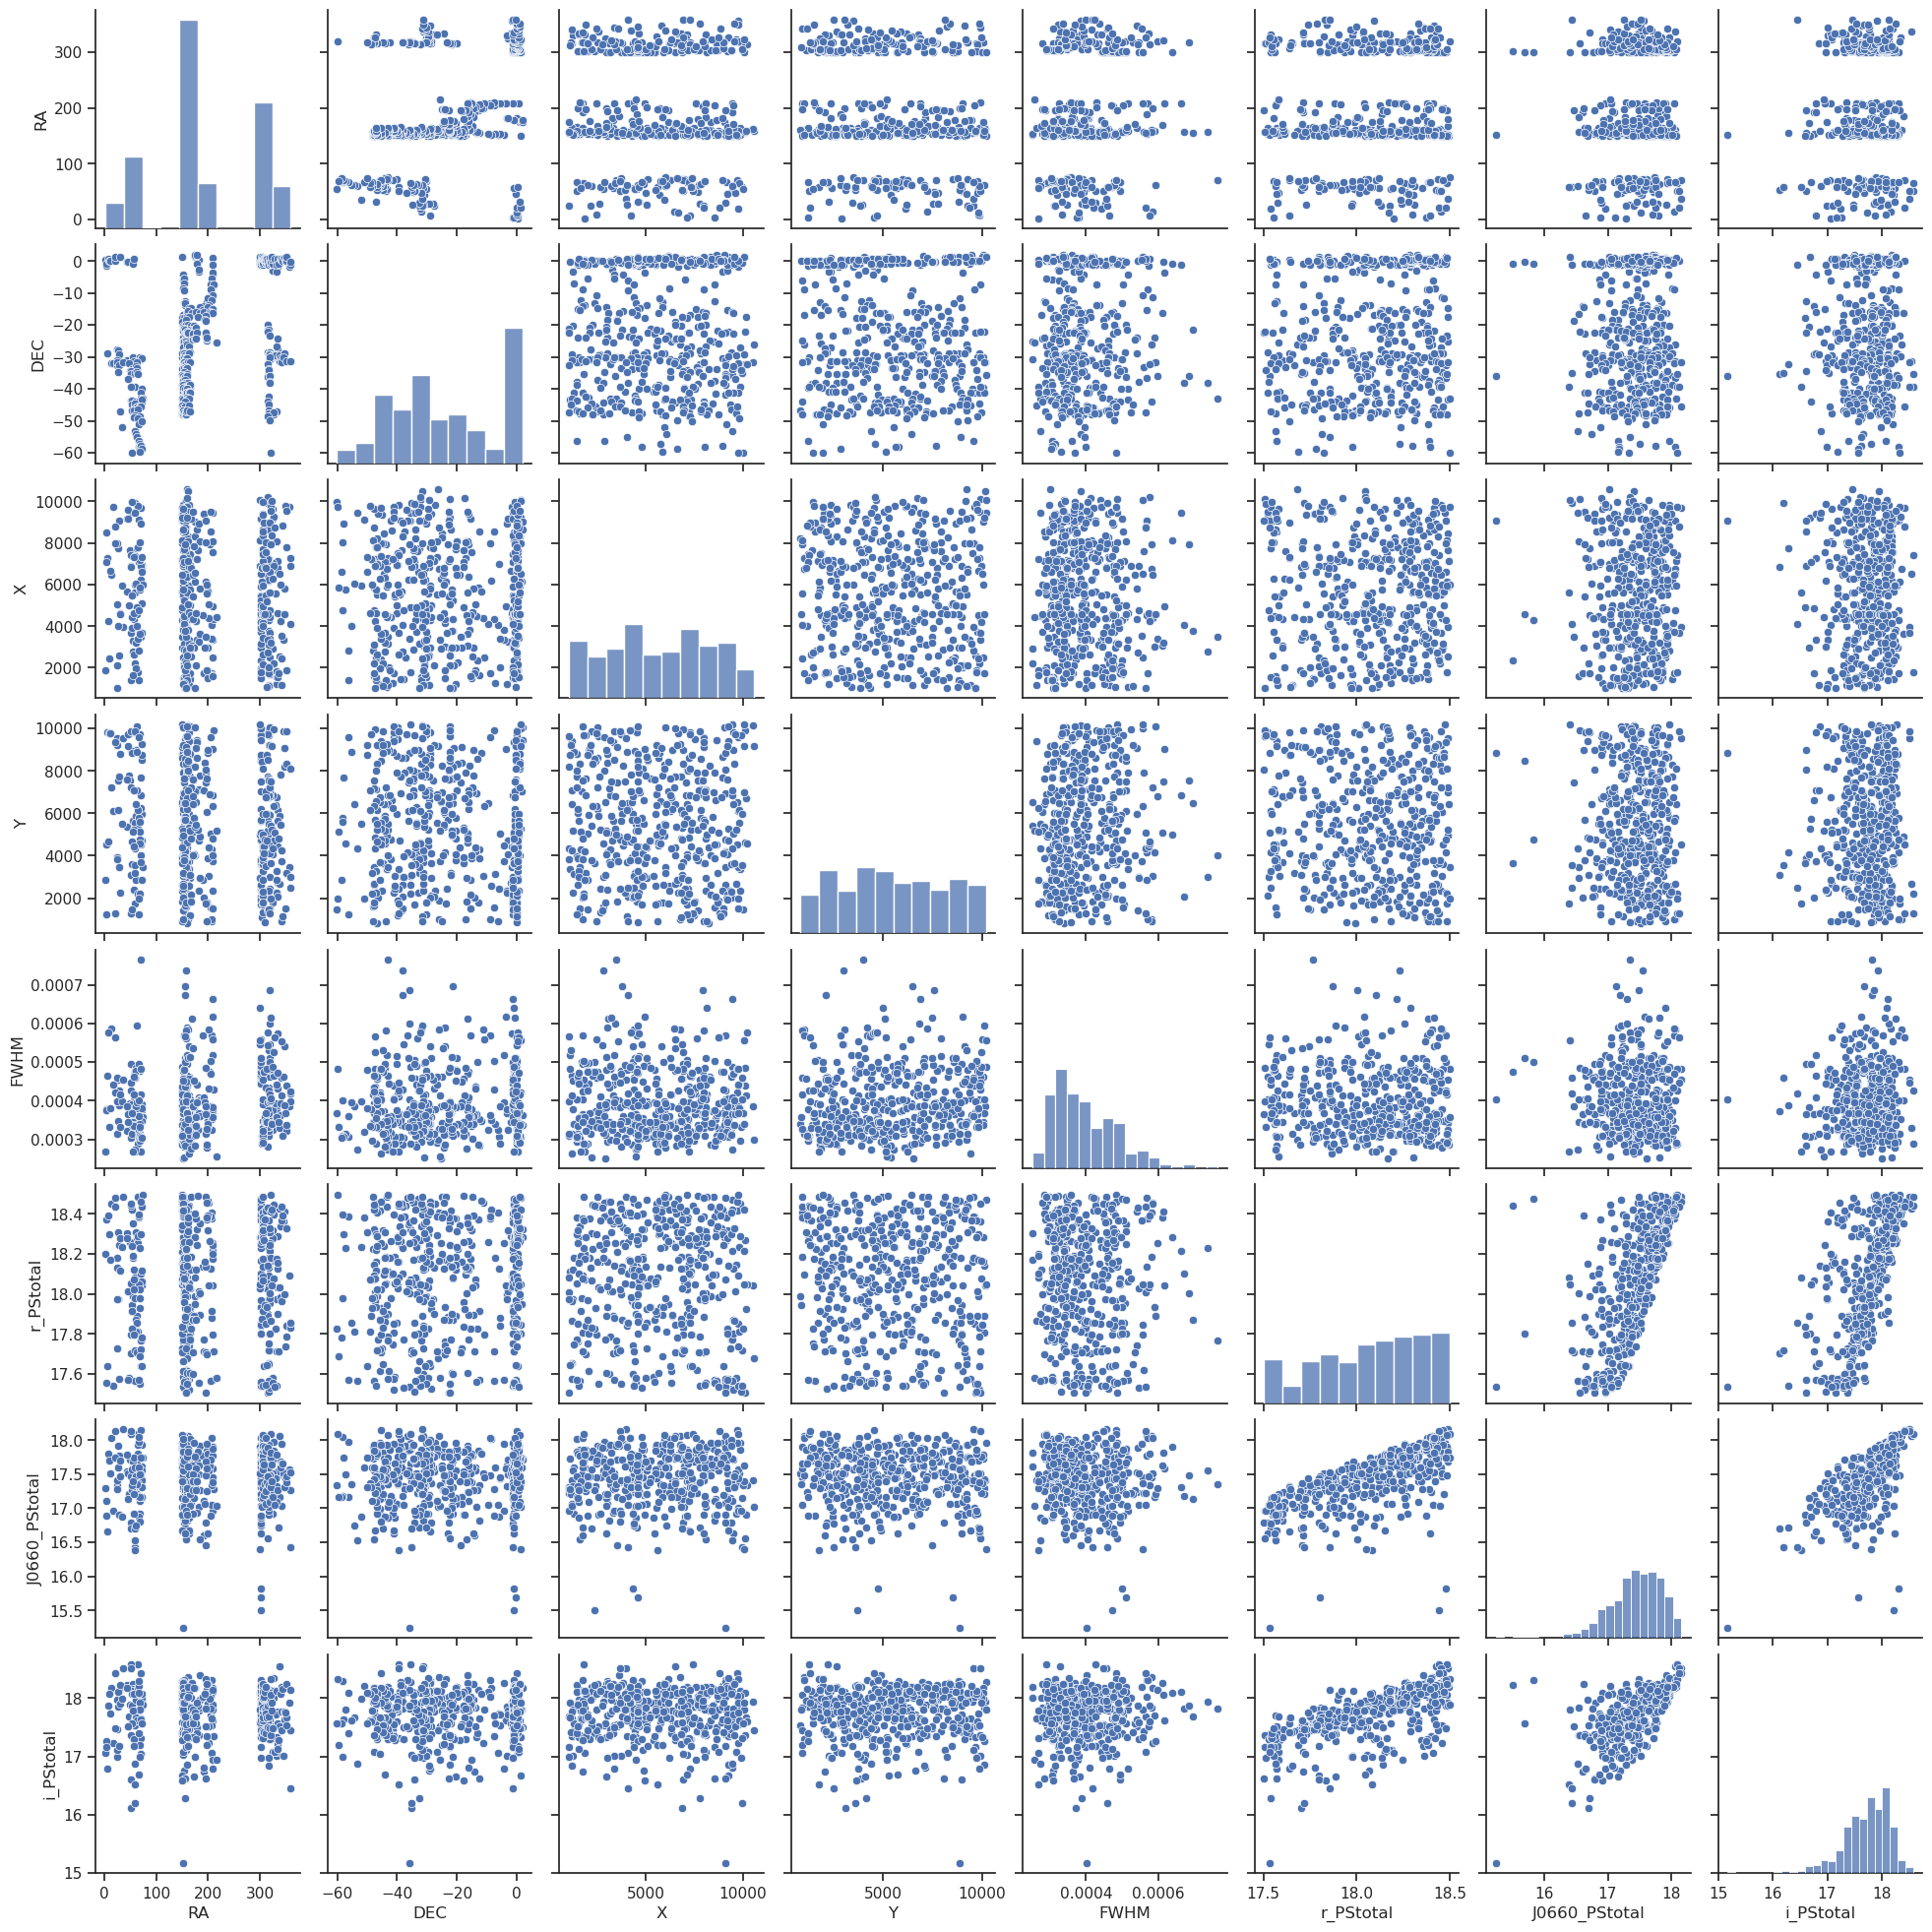

In [30]:
df_upper = tab_clean_upper.to_pandas()
#Select columns 
df_upper_ = df_upper[["RA", "DEC", "X", "Y", "FWHM", "r_PStotal", "J0660_PStotal", "i_PStotal"]]
             
sns.pairplot(df_upper_)

### JUST ONE FIELD

In [31]:
mask_field = tab_clean["Field"] == "b'STRIPE82-0170'"
tab_clean_field = tab_clean[mask_field]

In [32]:
tab_clean_field

Field,ID,RA,DEC,X,Y,FWHM,FWHM_n,ISOarea,KRON_RADIUS,MU_MAX_INST,PETRO_RADIUS,SEX_FLAGS_DET,SEX_NUMBER_DET,CLASS_STAR,s2n_DET_PStotal,THETA,ELLIPTICITY,ELONGATION,FLUX_RADIUS_20,FLUX_RADIUS_50,FLUX_RADIUS_70,FLUX_RADIUS_90,s2n_r_PStotal,s2n_J0660_PStotal,s2n_i_PStotal,FWHM_r,FWHM_n_r,FWHM_J0660,FWHM_n_J0660,FWHM_i,FWHM_n_i,SEX_FLAGS_r,SEX_FLAGS_J0660,SEX_FLAGS_i,CLASS_STAR_r,CLASS_STAR_J0660,CLASS_STAR_i,r_PStotal,e_r_PStotal,g_PStotal,e_g_PStotal,i_PStotal,e_i_PStotal,u_PStotal,e_u_PStotal,z_PStotal,e_z_PStotal,J0378_PStotal,e_J0378_PStotal,J0395_PStotal,e_J0395_PStotal,J0410_PStotal,e_J0410_PStotal,J0430_PStotal,e_J0430_PStotal,J0515_PStotal,e_J0515_PStotal,J0660_PStotal,e_J0660_PStotal,J0861_PStotal,e_J0861_PStotal,r_psf,e_r_psf,g_psf,e_g_psf,i_psf,e_i_psf,u_psf,e_u_psf,z_psf,e_z_psf,J0378_psf,e_J0378_psf,J0395_psf,e_J0395_psf,J0410_psf,e_J0410_psf,J0430_psf,e_J0430_psf,J0515_psf,e_J0515_psf,J0660_psf,e_J0660_psf,J0861_psf,e_J0861_psf
str16,str31,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
b'STRIPE82-0170',b'iDR4_3_STRIPE82-0170_0000176',358.26099466949114,-0.0031095435668058,7606.2383,898.0976,0.00035515576,1.1035913,1.400463e-06,3.374022,15.1886835,3.3,0,176,0.9826938,-1.0,48.64368,0.11590177,1.131096,0.7437013,1.3680922,1.8827856,3.1140993,109.08086,109.31453,161.04436,0.00035194852,1.0611614,0.00038751515,0.9861318,0.00035129825,1.1100022,0,0,0,1,1.0,1,17.76041,0.009830923,19.164757,0.024171505,16.88322,0.0066677453,23.62348,1.459356,16.461594,0.007116137,21.850285,0.44419378,23.455261,2.950775,20.942837,0.29177195,20.253428,0.15206103,19.111025,0.051229984,17.46331,0.0098099075,16.58886,0.010102833,17.833858,0.025,19.211424,0.041,16.958132,0.033,--,--,16.539856,0.044,--,--,--,--,20.588423,0.187,20.018423,0.109,19.203423,0.068,17.487858,0.036,16.709856,0.051
b'STRIPE82-0170',b'iDR4_3_STRIPE82-0170_0000152',358.5675098189913,-0.0040082777865366,5599.784,892.2144,0.00034729144,1.0791541,1.3070988e-06,3.4064121,15.372517,3.3,0,152,0.9910736,-1.0,72.743645,0.05626452,1.059619,0.72846234,1.3501669,1.8584311,3.0779293,111.53755,94.407,107.33604,0.00032895576,0.99183583,0.00039128325,0.9957207,0.0003326281,1.0510098,0,0,0,1,--,1,17.743286,0.009535707,18.299992,0.013853378,17.570305,0.009884952,19.697878,0.048504677,17.538929,0.014730576,19.429241,0.05935503,19.471703,0.090761475,18.698668,0.048700172,18.587156,0.04309039,18.049032,0.024913356,17.732096,0.011266001,17.526043,0.018313926,17.80932,0.026,18.349314,0.03,17.626637,0.034,19.598248,0.049,17.619442,0.056,19.30725,0.051,19.302248,0.076,18.666315,0.046,18.626314,0.046,18.107315,0.03,--,--,--,--
b'STRIPE82-0170',b'iDR4_3_STRIPE82-0170_0000236',359.0200983314737,-0.0011694858356955,2637.1091,910.79816,0.00032049447,0.99588674,1.0736883e-06,3.4983084,15.6241255,3.3,0,236,0.98206085,-1.0,-27.084618,0.042366505,1.0442408,0.70477766,1.3149136,1.7856632,3.1008422,74.61504,75.33955,119.18592,0.00036977092,1.1148977,0.00049040566,1.2479631,0.000300621,0.9498765,0,0,0,1,--,1,18.374008,0.0143938335,19.692095,0.034823257,17.391794,0.009037117,23.3486,1.1443163,16.931545,0.009828248,25.789581,16.442633,99.0,99.0,21.416285,0.44354436,20.859373,0.25963125,19.624182,0.0754009,18.078539,0.014255416,17.059032,0.013759796,18.429033,0.026,19.712942,0.055,17.429468,0.027,--,--,16.988628,0.039,--,--,--,--,--,--,--,--,19.585941,0.071,--,--,17.133629,0.044
b'STRIPE82-0170',b'iDR4_3_STRIPE82-01

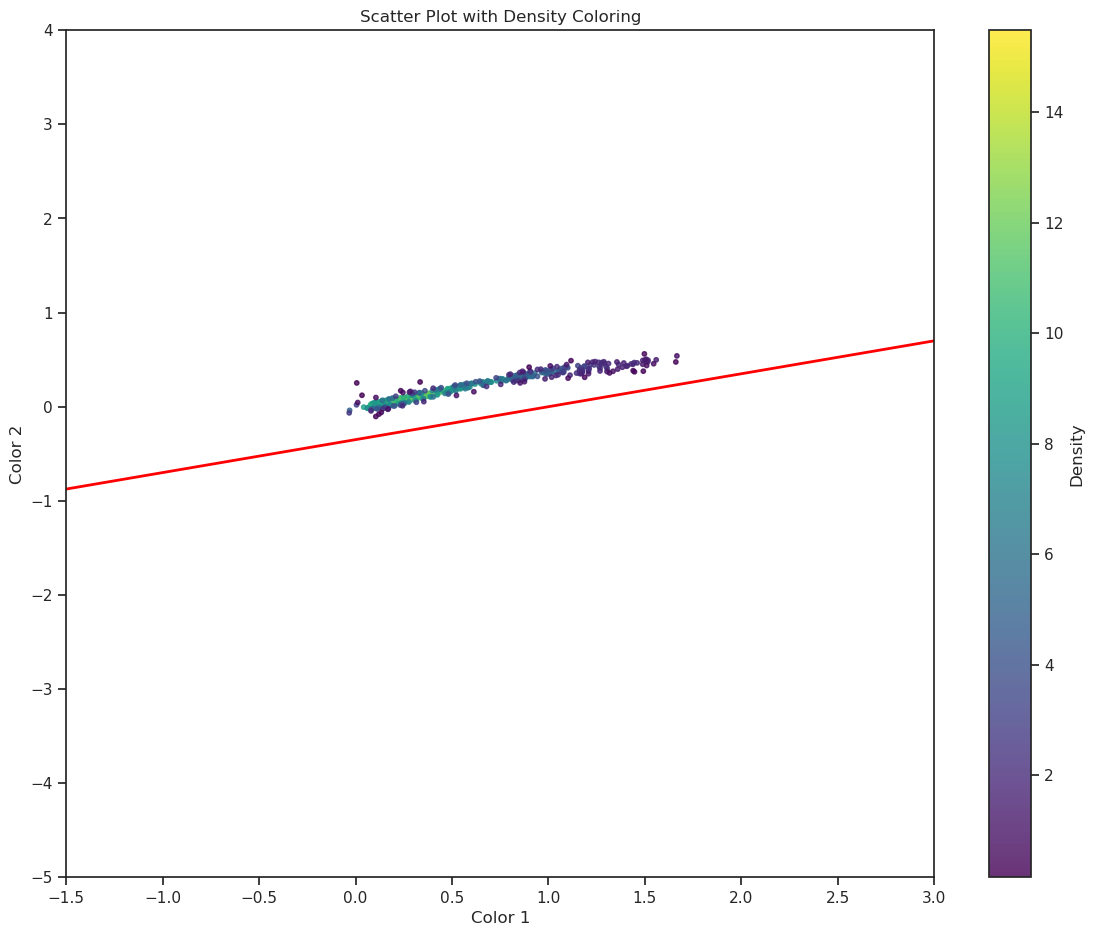

In [33]:
plots(tab_clean_field["r_PStotal"] - tab_clean_field["i_PStotal"], tab_clean_field["r_PStotal"] - tab_clean_field["J0660_PStotal"], x_values, y_values, xlim=(-1.5, 3), ylim=(-5, 4))

In [34]:
tab_clean_df = tab_clean.to_pandas()

save_file_name = file_.split("PSF-")[-1].split("_class05")[0]
#Save Pandas DataFrame to CSV file
tab_clean_df.to_csv(file_.replace(".csv", "_clean.csv"), index=False)